In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import zipfile
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score
import time
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data (1).csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.corr() #matriks korelasi, nilai korelasi dari -1 sampai 1

<ipython-input-11-f1c94c5e2e33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #matriks korelasi, nilai korelasi dari -1 sampai 1


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df = df.fillna(df.mean()) # df fillna untuk mengisi nilai-nilai yang hilang #df mean untuk menghitung rata" untuk setiap kolo
#jadi variable ini dipake untuk menggantikan setiap nilai Nan dalam dataframe dengan nilai rata"  dari kolom yang sesuai

<ipython-input-13-07ee6e08ae04>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean()) # df fillna untuk mengisi nilai-nilai yang hilang #df mean untuk menghitung rata" untuk setiap kolo


In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
def label_transform(x):
  le = LabelEncoder()
  Encoded_le = le.fit_transform(x)
  return Encoded_le

In [ ]:
df_transformed = df.copy()
print("copy is created...")

copy is created...


In [ ]:
catagoral_labels = ['gender','ever_married','work_type' ,'Residence_type','smoking_status']
for x in catagoral_labels:
  df_transformed[x] = label_transform(df_transformed[x])

In [ ]:
df_transformed.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
scaler = StandardScaler()
df_transformed[['age','hypertension','heart_disease','avg_glucose_level','bmi']] = scaler.fit_transform(df_transformed[['age','hypertension','heart_disease','avg_glucose_level','bmi']])

In [ ]:
df_transformed.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,1.051434,-0.328602,4.185032,1,2,1,2.706375,1.001234e+00,1,1
1,51676,0,0.786070,-0.328602,-0.238947,1,3,0,2.121559,4.615554e-16,2,1
2,31112,1,1.626390,-0.328602,4.185032,1,2,0,-0.005028,4.685773e-01,2,1
3,60182,0,0.255342,-0.328602,-0.238947,1,2,1,1.437358,7.154182e-01,3,1
4,1665,0,1.582163,3.043196,-0.238947,1,3,0,1.501184,-6.357112e-01,2,1


# **KNN**

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(df_transformed[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender','ever_married','work_type' ,'Residence_type','smoking_status']],df_transformed["stroke"],test_size=0.20,random_state=21)
print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(4088, 10)
Shape of Test Xs:(1022, 10)
Shape of Training y:(4088,)
Shape of Test y:(1022,)


In [ ]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred= classifier.predict(x_test)
y_pred[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
print("accuracy of test set using linear regression",classifier.score(x_test,y_test))

accuracy of test set using linear regression 0.9461839530332681


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cnf_matrix

array([[967,   5],
       [ 50,   0]])

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[967   5]
 [ 50   0]]
Normalized confusion matrix
[[0.99 0.01]
 [1.   0.  ]]


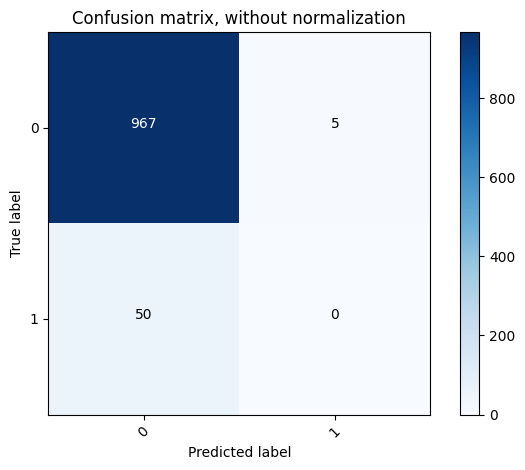

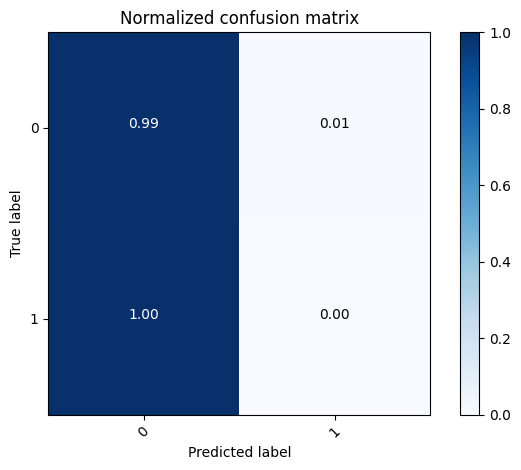

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

x = df_transformed[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender','ever_married','work_type' ,'Residence_type','smoking_status']]
y = df_transformed['stroke']
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
print(scores)

[0.95 0.95 0.95 0.95 0.95]


In [ ]:
print("accuracy of model using cross validation",scores.mean())

accuracy of model using cross validation 0.9475538160469668


# **Oversampling KNN**

In [ ]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 5
knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_classifier.fit(x_train_smote, y_train_smote)


KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       972
           1       0.12      0.50      0.19        50

    accuracy                           0.79      1022
   macro avg       0.54      0.65      0.53      1022
weighted avg       0.93      0.79      0.85      1022

Accuracy: 0.79


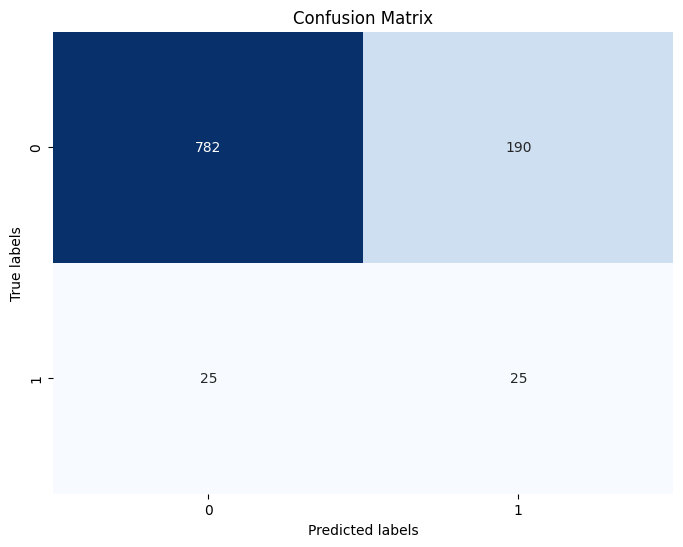

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred))

0.7896281800391389


# **Logistik Regression**

In [ ]:
df_transformed.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,1.051434,-0.328602,4.185032,1,2,1,2.706375,1.001234e+00,1,1
1,51676,0,0.786070,-0.328602,-0.238947,1,3,0,2.121559,4.615554e-16,2,1
2,31112,1,1.626390,-0.328602,4.185032,1,2,0,-0.005028,4.685773e-01,2,1
3,60182,0,0.255342,-0.328602,-0.238947,1,2,1,1.437358,7.154182e-01,3,1
4,1665,0,1.582163,3.043196,-0.238947,1,3,0,1.501184,-6.357112e-01,2,1


In [ ]:
x_train, x_test, y_train, y_test =train_test_split(df_transformed[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender','ever_married','work_type' ,'Residence_type','smoking_status']],df_transformed["stroke"],test_size=0.20,random_state=21)
print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(4088, 10)
Shape of Test Xs:(1022, 10)
Shape of Training y:(4088,)
Shape of Test y:(1022,)


In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Setelah melatih model
coefficients = logistic_regression.coef_

# Jumlah parameter
jumlah_parameter = coefficients.shape[1]
print(f"Jumlah parameter: {jumlah_parameter}")


Jumlah parameter: 10


In [ ]:
y_pred = logistic_regression.predict(x_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Accuracy: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


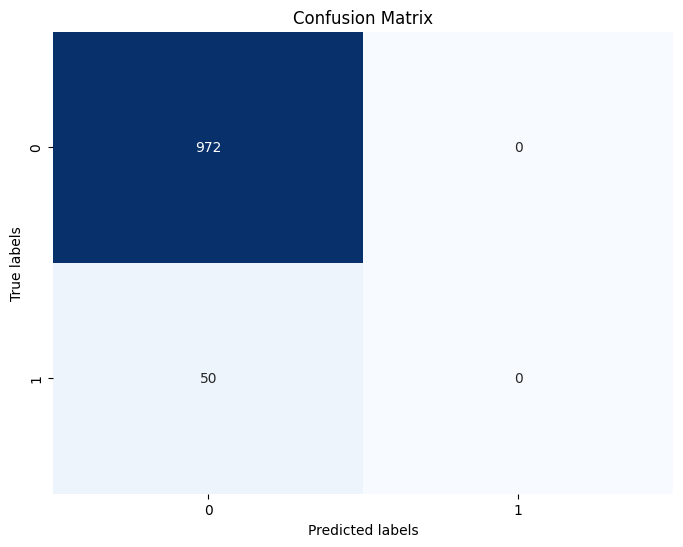

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9510763209393346


In [ ]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_smote, y_train_smote)

LogisticRegression()

In [ ]:
y_pred = logistic_regression.predict(x_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.98      0.74      0.85       972
           1       0.13      0.74      0.22        50

    accuracy                           0.74      1022
   macro avg       0.56      0.74      0.53      1022
weighted avg       0.94      0.74      0.82      1022

Accuracy: 0.74


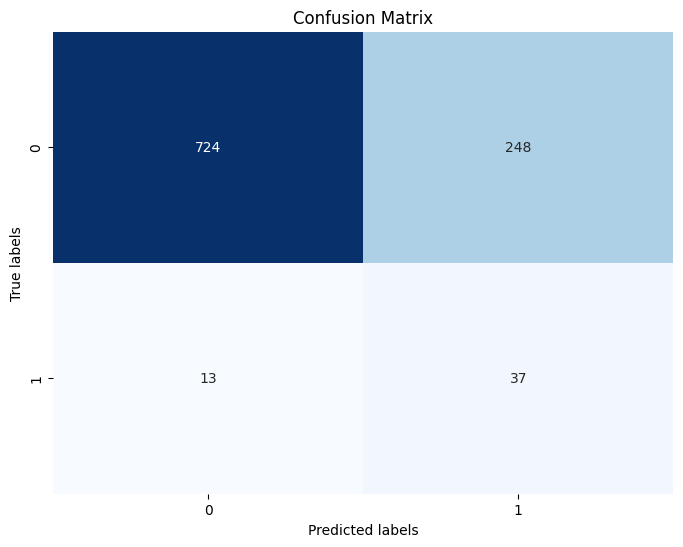

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred))

0.7446183953033269


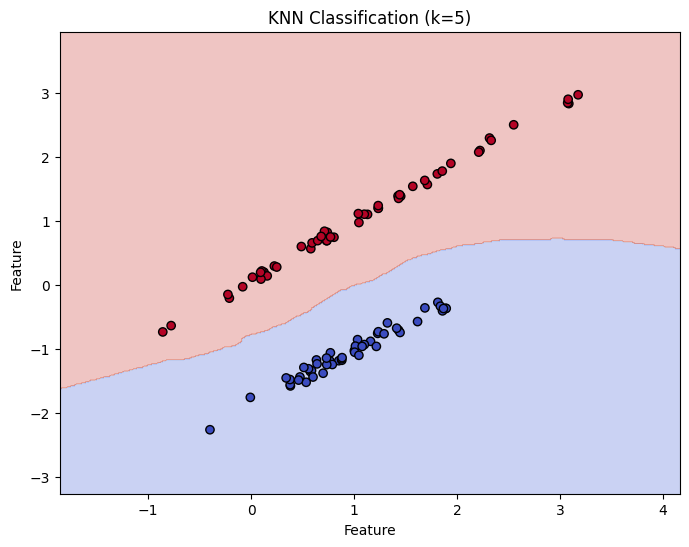

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.title('KNN Classification (k=5)')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.show()


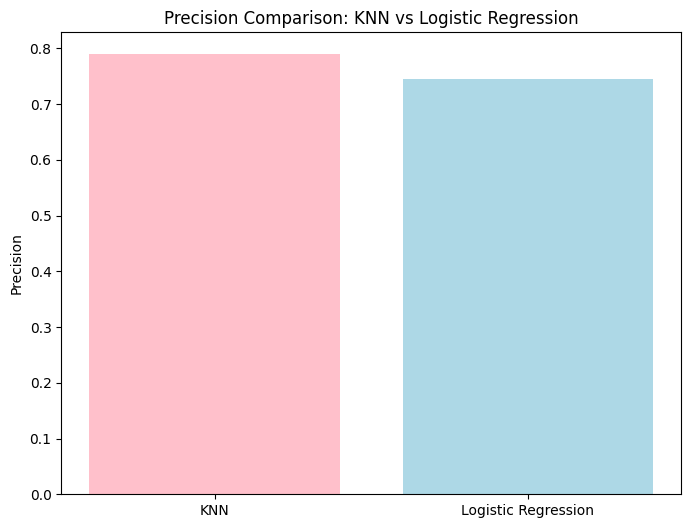

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['KNN', 'Logistic Regression']
precision_scores = [0.7896281800391389, 0.7446183953033269]

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(labels, precision_scores, color=['pink', 'lightblue'])

ax.set_ylabel('Precision')
ax.set_title('Precision Comparison: KNN vs Logistic Regression')

plt.show()


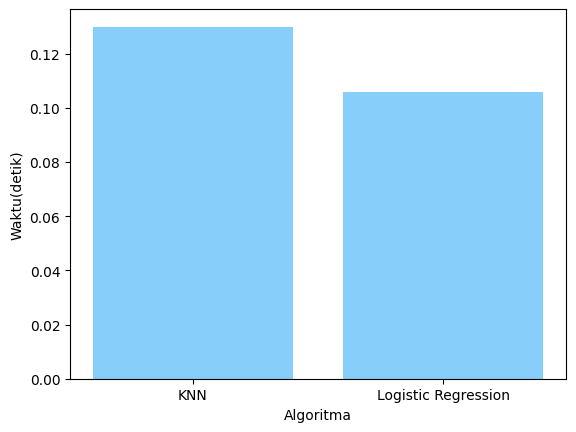

In [ ]:
import matplotlib.pyplot as plt

# Algoritma dan waktu eksekusi
algorithms = ['KNN', 'Logistic Regression']
execution_times = [0.13, 0.106]

# Plot diagram
plt.bar(algorithms, execution_times, color=['#87CEFA', '#87CEFA'])
plt.xlabel('Algoritma')
plt.ylabel('Waktu(detik)')
plt.show()
